In [87]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [88]:
# Define the instruments to download. We would like to see Apple, Google and the S&P500 index.
tickers = ['AAPL', 'GOOG', 'AMZN', 'COKE','NFLX','^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2019-09-01'
end_date =  dt.datetime.now()

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
panel_data = data.get_data_yahoo(tickers, start = start_date)['Adj Close']


In [89]:
panel_data

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2019-09-03,50.594368,1168.390015,1789.839966,331.243744,289.290009,2906.270020
2019-09-04,51.452774,1181.410034,1800.619995,310.488281,291.519989,2937.780029
2019-09-05,52.458755,1211.380005,1840.719971,303.569824,293.250000,2976.000000
2019-09-06,52.453838,1204.930054,1833.510010,296.303894,290.170013,2978.709961
2019-09-09,52.677666,1204.410034,1831.349976,290.288727,294.339996,2978.429932
...,...,...,...,...,...,...
2021-09-03,154.300003,2895.500000,3478.050049,398.500000,590.530029,4535.430176
2021-09-07,156.690002,2910.379883,3509.290039,393.549988,606.710022,4520.029785
2021-09-08,155.110001,2897.669922,3525.500000,400.649994,606.049988,4514.069824


In [90]:
panel_data.describe()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,102.519049,1741.950693,2746.680229,283.587841,448.540978,3506.133992
std,30.469408,495.989194,650.141189,57.644990,92.000275,531.183273
min,50.594368,1056.619995,1676.609985,191.493073,254.589996,2237.399902
25%,72.439266,1353.869995,1954.719971,241.830132,368.869995,3099.015015
50%,112.970894,1522.020020,3095.129883,271.770660,488.239990,3373.429932
75%,127.412361,2082.510010,3265.515015,294.630661,518.484985,3915.984985
max,156.690002,2916.840088,3731.409912,450.684540,606.710022,4536.950195


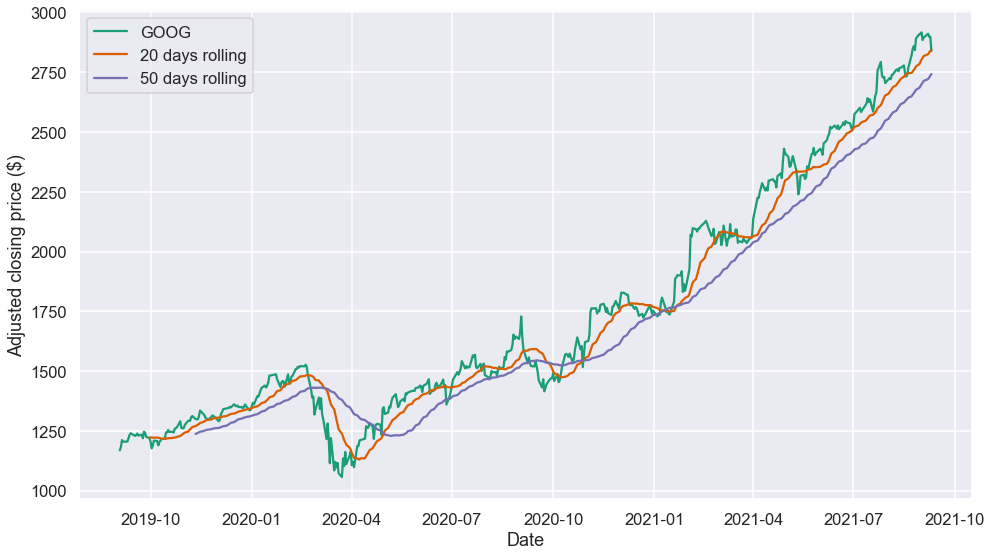

In [91]:
# Get the GOOg timeseries. This now returns a Pandas Series object indexed by date.
goog = panel_data.loc[:, 'GOOG']

# Calculate the 20 and 50 days moving averages of the closing prices
short_rolling_goog = goog.rolling(window=20).mean()
long_rolling_goog = goog.rolling(window=50).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(goog.index, goog, label='GOOG')
ax.plot(short_rolling_goog.index, short_rolling_goog, label='20 days rolling')
ax.plot(long_rolling_goog.index, long_rolling_goog, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [92]:
# Calculating the short-window moving average
short_rolling = panel_data.rolling(window=20).mean()
short_rolling.head()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-05,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-06,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Calculating the short-window moving average
long_rolling = panel_data.rolling(window=50).mean()
long_rolling.tail()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2021-09-03,146.064654,2713.662998,3459.482793,400.788223,533.926200,4407.510586
2021-09-07,146.540236,2721.072598,3461.639395,400.555376,535.519000,4412.297178
2021-09-08,146.950869,2728.298198,3463.271597,400.533287,536.979399,4416.766377
2021-09-09,147.309748,2735.856196,3463.991997,400.453154,538.260199,4420.795977
2021-09-10,147.554046,2742.498193,3464.571797,400.215667,539.670398,4424.017578


In [94]:
# Relative returns
returns = panel_data.pct_change(1)
returns.head()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,0.016966,0.011144,0.006023,-0.062659,0.007708,0.010842
2019-09-05,0.019552,0.025368,0.022270,-0.022283,0.005934,0.013010
2019-09-06,-0.000094,-0.005324,-0.003917,-0.023935,-0.010503,0.000911
2019-09-09,0.004267,-0.000432,-0.001178,-0.020301,0.014371,-0.000094


In [95]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(panel_data).diff()
log_returns.head()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,0.016824,0.011082,0.006005,-0.064708,0.007679,0.010784
2019-09-05,0.019363,0.025052,0.022026,-0.022535,0.005917,0.012926
2019-09-06,-0.000094,-0.005339,-0.003925,-0.024226,-0.010558,0.000910
2019-09-09,0.004258,-0.000432,-0.001179,-0.020510,0.014269,-0.000094


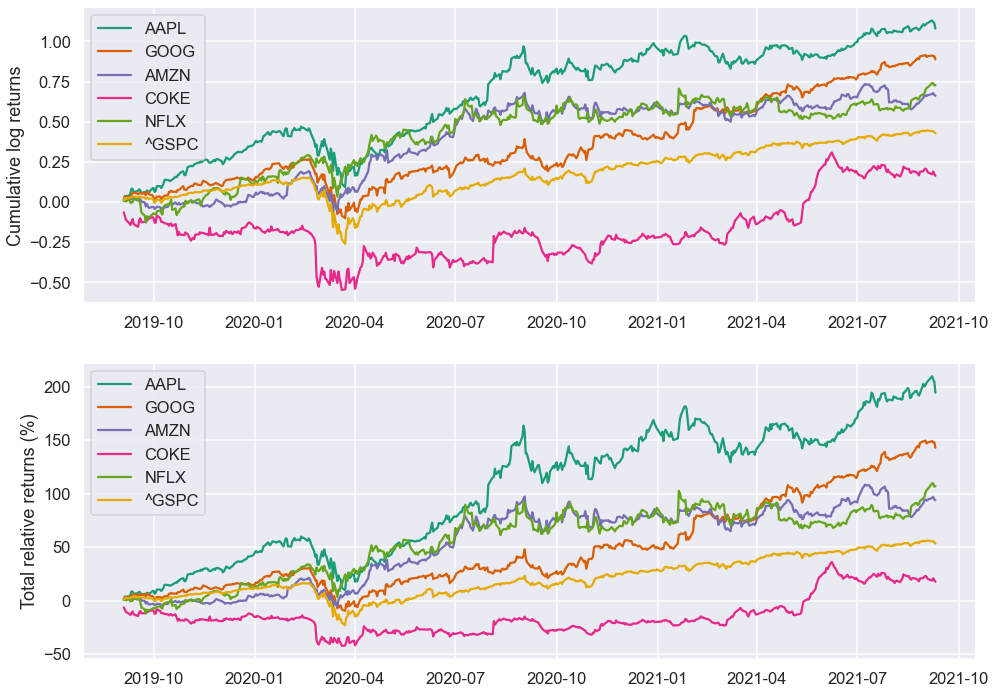

In [96]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

# Quantitative trading strategy

In [97]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t

Date,2021-09-10
Symbols,
AAPL,-0.033662
GOOG,-0.020866
AMZN,-0.004317
COKE,-0.010534
NFLX,0.001973
^GSPC,-0.007753


In [98]:
# Weights as defined above
weights_vector = pd.DataFrame(1 / 6, index=r_t.index, columns=r_t.columns)
weights_vector

Date,2021-09-10
Symbols,
AAPL,0.166667
GOOG,0.166667
AMZN,0.166667
COKE,0.166667
NFLX,0.166667
^GSPC,0.166667


# Total log_return for the portfolio is:


In [99]:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

Date,2021-09-10
Date,
2021-09-10,-0.012527


In [100]:
#let us consider a very simple trading strategy, where the investor splits his investments equally among all three assets
weights_matrix = pd.DataFrame(1 / 7, index=panel_data.index, columns=panel_data.columns)
weights_matrix.tail()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2021-09-03,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2021-09-07,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2021-09-08,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2021-09-09,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2021-09-10,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857


In [101]:
log_returns.head()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,0.016824,0.011082,0.006005,-0.064708,0.007679,0.010784
2019-09-05,0.019363,0.025052,0.022026,-0.022535,0.005917,0.012926
2019-09-06,-0.000094,-0.005339,-0.003925,-0.024226,-0.010558,0.000910
2019-09-09,0.004258,-0.000432,-0.001179,-0.020510,0.014269,-0.000094


In [102]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

Date,2019-09-03,2019-09-04,2019-09-05,2019-09-06,2019-09-09
Date,,,,,
2019-09-03,NaN,-0.001762,0.008964,-0.006176,-0.000527
2019-09-04,NaN,-0.001762,0.008964,-0.006176,-0.000527
2019-09-05,NaN,-0.001762,0.008964,-0.006176,-0.000527
2019-09-06,NaN,-0.001762,0.008964,-0.006176,-0.000527
2019-09-09,NaN,-0.001762,0.008964,-0.006176,-0.000527


In [103]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

#these returns are only estimates because of our use of log-returns instead of relative returns

Date
2021-09-03   -0.000112
2021-09-07    0.005795
2021-09-08    0.000796
2021-09-09   -0.007636
2021-09-10   -0.010737
dtype: float64

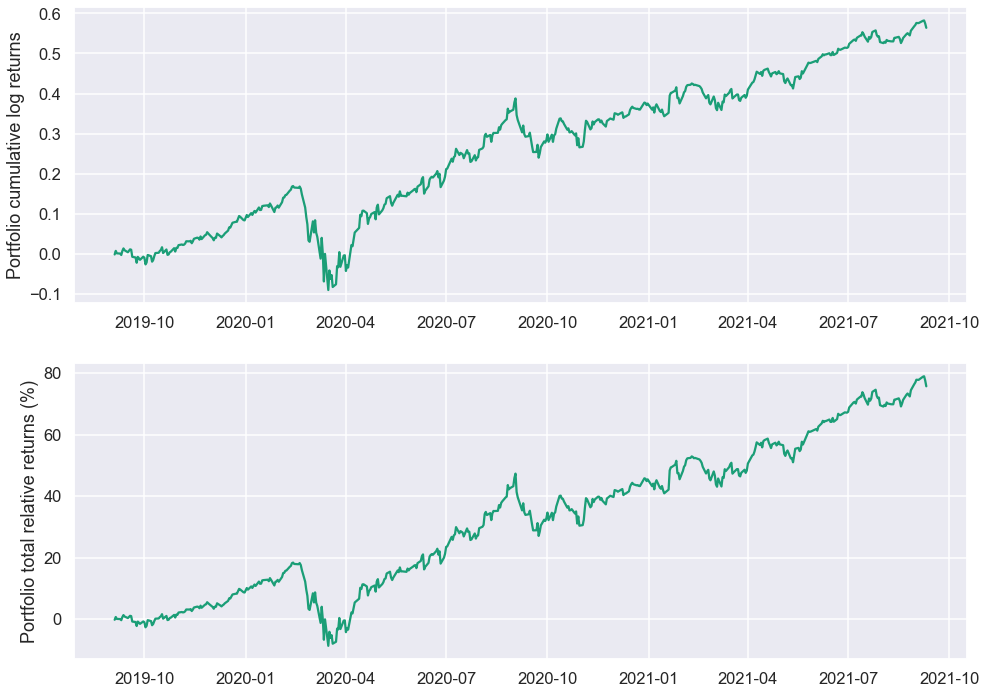

In [104]:
# Let us see what our cumulative log returns and the total relative returns for this portfolio look.
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [105]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = panel_data.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 75.77%
Average yearly return is: 33.24%


In [106]:
# Calculating the short-window simple moving average
short_rolling = panel_data.rolling(window=20).mean()
short_rolling.head(20)

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-05,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-06,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-11,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-12,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-13,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Calculating the long-window simple moving average
long_rolling = panel_data.rolling(window=50).mean()
long_rolling.tail()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2021-09-03,146.064654,2713.662998,3459.482793,400.788223,533.926200,4407.510586
2021-09-07,146.540236,2721.072598,3461.639395,400.555376,535.519000,4412.297178
2021-09-08,146.950869,2728.298198,3463.271597,400.533287,536.979399,4416.766377
2021-09-09,147.309748,2735.856196,3463.991997,400.453154,538.260199,4420.795977
2021-09-10,147.554046,2742.498193,3464.571797,400.215667,539.670398,4424.017578


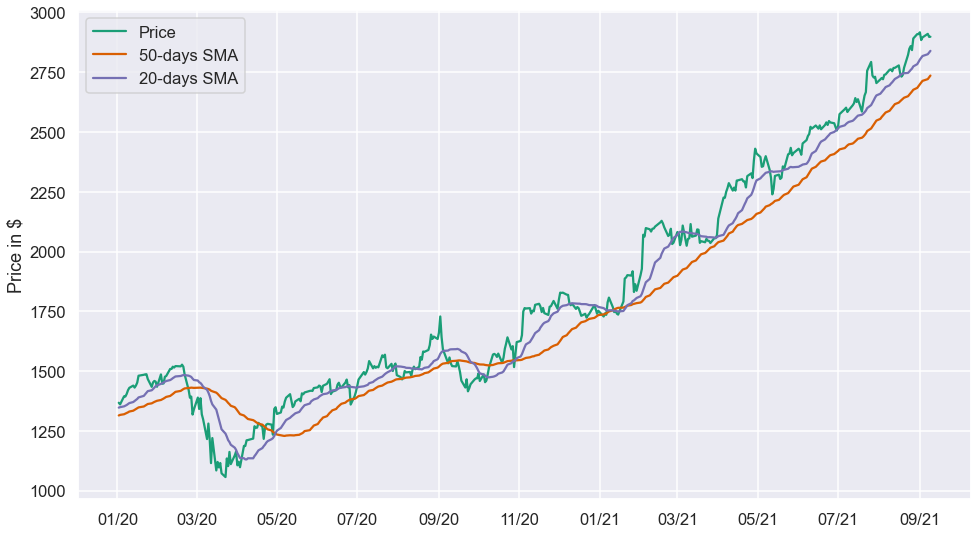

In [108]:
start_date = '2020-01-01'
end_date = '2021-09-09'

#simple moving averages (SMA)
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(panel_data.loc[start_date:end_date, :].index, panel_data.loc[start_date:end_date, 'GOOG'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'GOOG'], label = '50-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'GOOG'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [109]:
# Calculating the short-window simple moving average
short_rolling = panel_data.rolling(window=20).mean()
short_rolling.head(20)

#Remember, again, that when calculating the  days SMA, the first  are not valid, as  prices
#are required for the first moving average data point.

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-05,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-06,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-11,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-12,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-13,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# Calculating the long-window simple moving average
long_rolling = panel_data.rolling(window=50).mean()
long_rolling.tail()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2021-09-03,146.064654,2713.662998,3459.482793,400.788223,533.926200,4407.510586
2021-09-07,146.540236,2721.072598,3461.639395,400.555376,535.519000,4412.297178
2021-09-08,146.950869,2728.298198,3463.271597,400.533287,536.979399,4416.766377
2021-09-09,147.309748,2735.856196,3463.991997,400.453154,538.260199,4420.795977
2021-09-10,147.554046,2742.498193,3464.571797,400.215667,539.670398,4424.017578


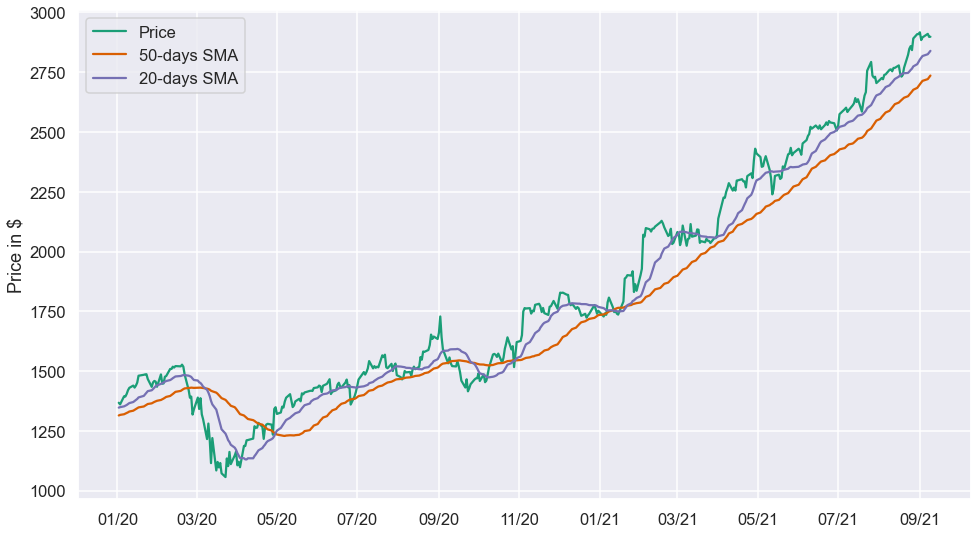

In [111]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(panel_data.loc[start_date:end_date, :].index, panel_data.loc[start_date:end_date, 'GOOG'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'GOOG'], label = '50-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'GOOG'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [112]:
# It is straightforward to observe that SMA timeseries are much less noisy than the original price timeseries. 
# However, this comes at a cost: SMA timeseries lag the original price timeseries, which means that changes in the trend are 
# only seen with a delay (lag) of  days.

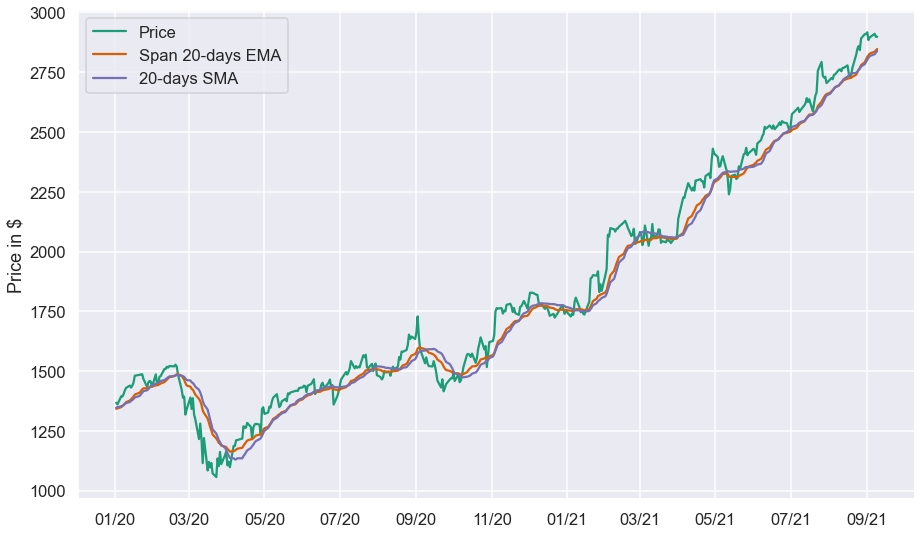

In [113]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = panel_data.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(panel_data.loc[start_date:end_date, :].index, panel_data.loc[start_date:end_date, 'GOOG'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'GOOG'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'GOOG'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

# Trading Signal

When the price timeseries  crosses the EMA timeseries  from below, we will close any existing short position and go long (buy) one unit of the asset.
When the price timeseries  crosses the EMA timeseries  from above, we will close any existing long position and go short (sell) one unit of the asset.
Exponential Moving Average (EMA)

In [114]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = panel_data - ema_short
trading_positions_raw.tail()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2021-09-03,4.527675,67.680959,96.070661,-2.497579,37.525212,56.175054
2021-09-07,6.258849,74.697905,115.185827,-6.738297,48.590423,36.891362
2021-09-08,4.233242,56.084330,118.881904,0.327261,43.365590,27.985554
2021-09-09,2.889130,51.285911,70.156881,-5.593888,31.536001,6.510227
2021-09-10,-2.000316,-7.748550,49.894788,-8.797808,29.600185,-25.504767


In [115]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/6
trading_positions = trading_positions_raw.apply(np.sign) * 1/6
trading_positions.tail()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2021-09-03,0.166667,0.166667,0.166667,-0.166667,0.166667,0.166667
2021-09-07,0.166667,0.166667,0.166667,-0.166667,0.166667,0.166667
2021-09-08,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2021-09-09,0.166667,0.166667,0.166667,-0.166667,0.166667,0.166667
2021-09-10,-0.166667,-0.166667,0.166667,-0.166667,0.166667,-0.166667


In [116]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

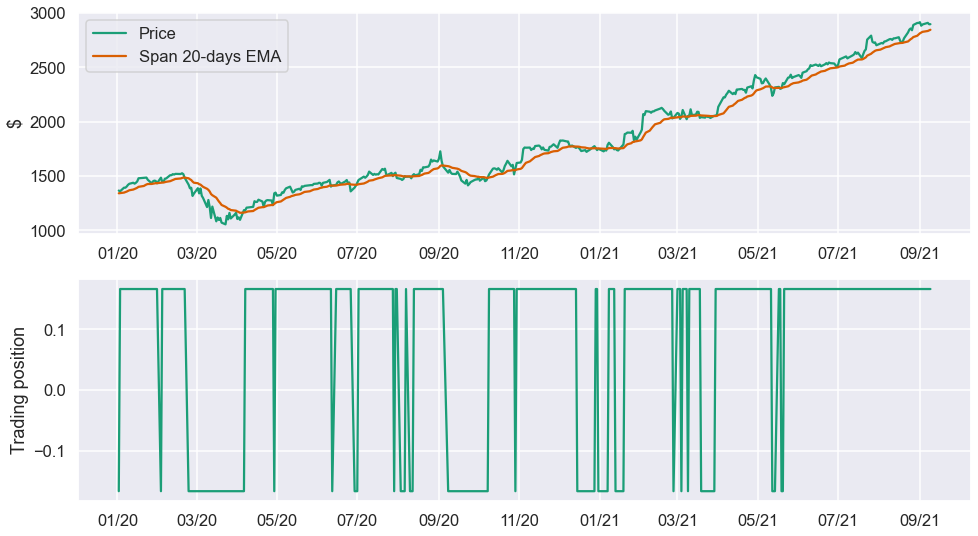

In [117]:
#Let us examine what the timeseries and the respective trading position look like for one of our assets, GOOG.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(panel_data.loc[start_date:end_date, :].index, panel_data.loc[start_date:end_date, 'GOOG'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'GOOG'], label = 'Span 20-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'GOOG'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [118]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(panel_data).diff()
asset_log_returns.head()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,0.016824,0.011082,0.006005,-0.064708,0.007679,0.010784
2019-09-05,0.019363,0.025052,0.022026,-0.022535,0.005917,0.012926
2019-09-06,-0.000094,-0.005339,-0.003925,-0.024226,-0.010558,0.000910
2019-09-09,0.004258,-0.000432,-0.001179,-0.020510,0.014269,-0.000094


In [119]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

Symbols,AAPL,GOOG,AMZN,COKE,NFLX,^GSPC
Date,,,,,,
2021-09-03,0.000704,0.000641,0.000717,-0.002697,0.000560,-0.000056
2021-09-07,0.002562,0.000854,0.001490,0.002083,0.004505,-0.000567
2021-09-08,-0.001689,-0.000729,0.000768,-0.002980,-0.000181,-0.000220
2021-09-09,-0.001121,0.000035,-0.001966,-0.002730,-0.002357,-0.000769
2021-09-10,-0.005610,-0.003478,-0.000720,0.001756,0.000329,-0.001292


Remembering that the log-returns can be added to show performance across time, let us plot the cumulative log-returns and the cumulative total relative returns of our strategy for each of the assets.

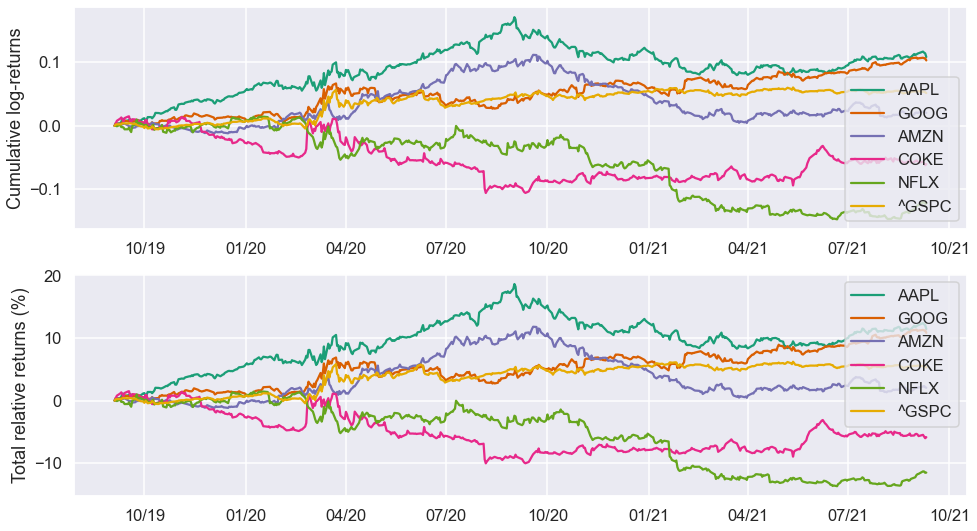

In [120]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

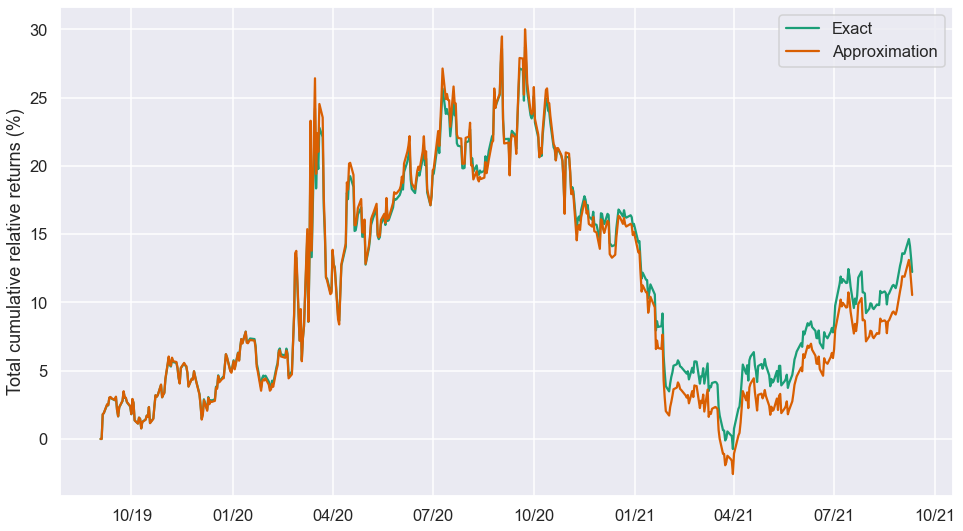

In [121]:
#Total Return of the Strategy
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [122]:
#The overall, yearly, performance of our strategy can be calculated again as:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 12.23%
Average yearly return is:  6.05%


Total portfolio return is: 70.37%
Average yearly return is: 31.14%


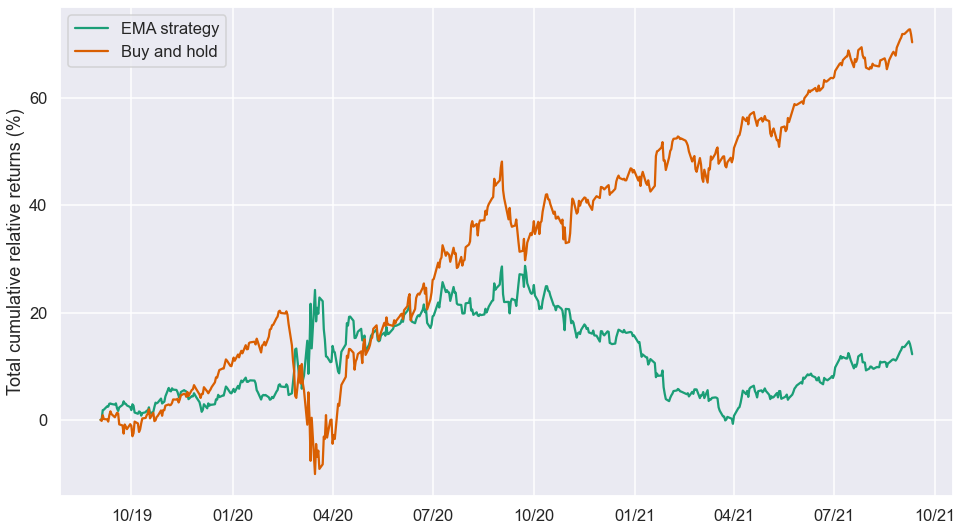

In [123]:
# Define the weights matrix for the simple buy-and-hold strategy
simple_weights_matrix = pd.DataFrame(1/6, index = panel_data.index, columns=panel_data.columns)

# Get the buy-and-hold strategy log returns per asset
simple_strategy_asset_log_returns = simple_weights_matrix * asset_log_returns

# Get the cumulative log-returns per asset
simple_cum_strategy_asset_log_returns = simple_strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
simple_cum_strategy_asset_relative_returns = np.exp(simple_cum_strategy_asset_log_returns) - 1

# Total strategy relative returns. This is the exact calculation.
simple_cum_relative_return_exact = simple_cum_strategy_asset_relative_returns.sum(axis=1)

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='EMA strategy')
ax.plot(simple_cum_relative_return_exact.index, 100*simple_cum_relative_return_exact, label='Buy and hold')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

print_portfolio_yearly_statistics(simple_cum_relative_return_exact)